In [1]:
import pickle
import tcav.utils_plot as utils_plot 
import pandas as pd
import numpy as np
import os

print(os.getcwd())
start_dir = os.getcwd() # /zhome/94/5/127021/speciale/tcav



/zhome/94/5/127021/speciale/tcav


In [2]:
file_dir = '/work3/s174498/TCAV_results' #'/work3/s174498/TCAV_results'
os.chdir(file_dir)

name = 'test_random_random_results_tcav_class_excludesmallfiles_logistic_zebra_500_5.pkl'
#name = 'results_pickle/results_tcav_class_excludesmallfiles_zebra_500_10.pkl'# 'results_pickle/results_zebra_50010.pkl'

# 'results_pickle/results_zebra_50010.pkl' 
# 'results_pickle/results_zebra_505.pkl'
# 'results_pickle/result_random500_100_to_102.pkl'

with open(name, 'rb') as f:
    data = pickle.load(f)

In [3]:
os.chdir(start_dir)

>>> Number of TCAV concept observations <<<
 500
>>> Number of TCAV random observations <<<
 2495


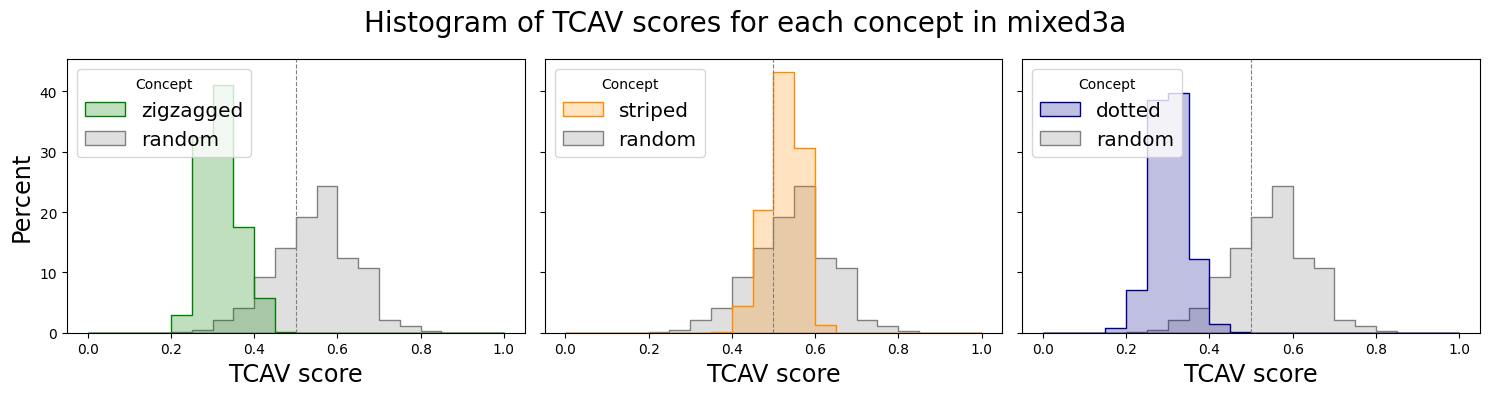

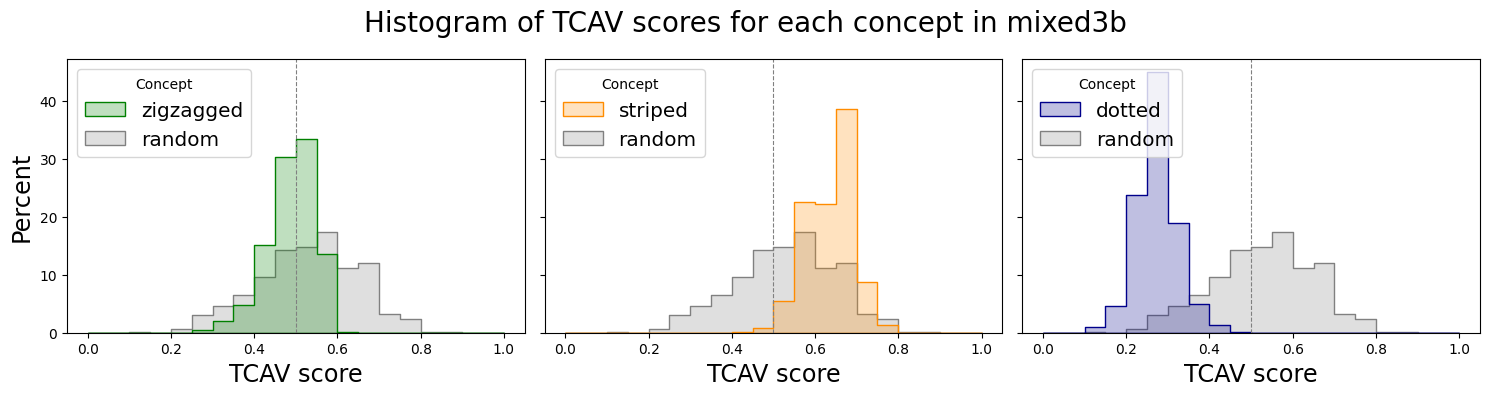

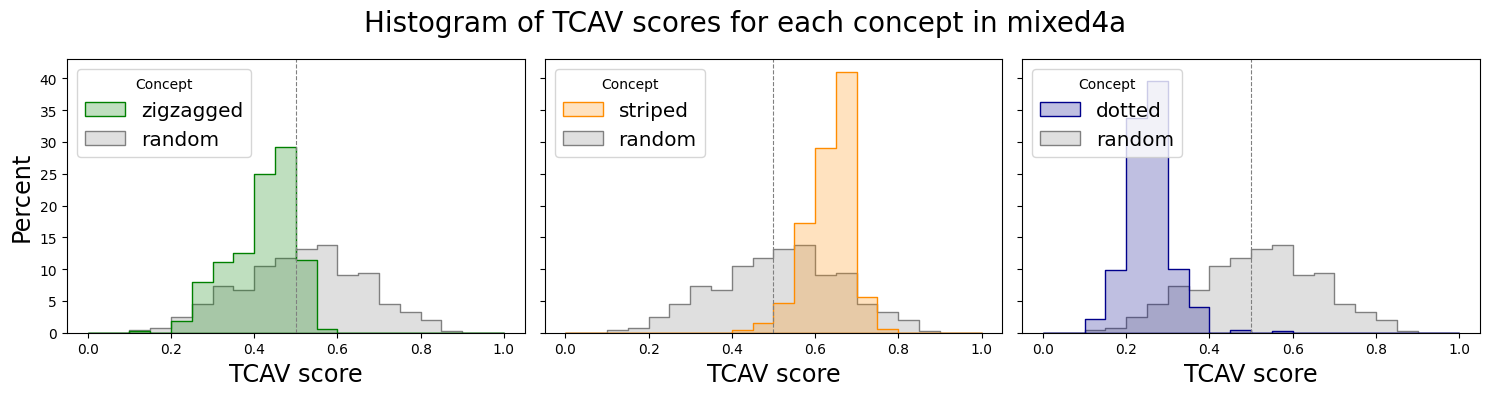

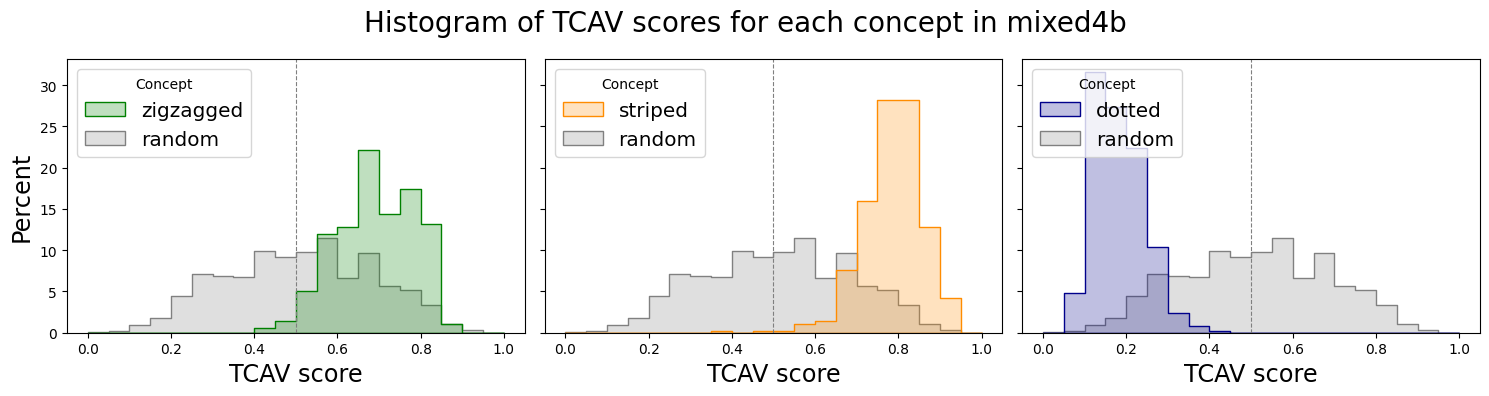

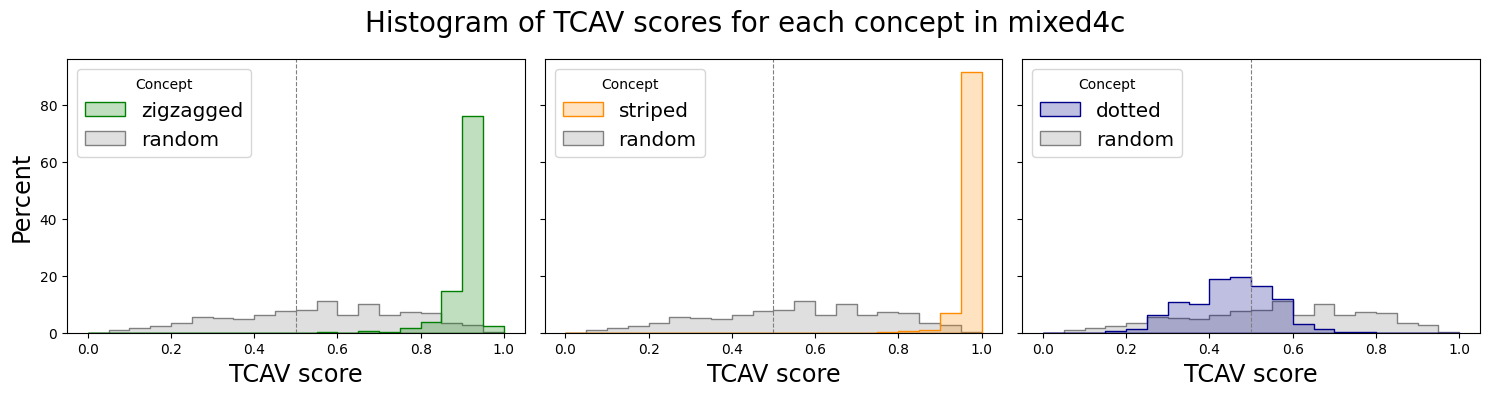

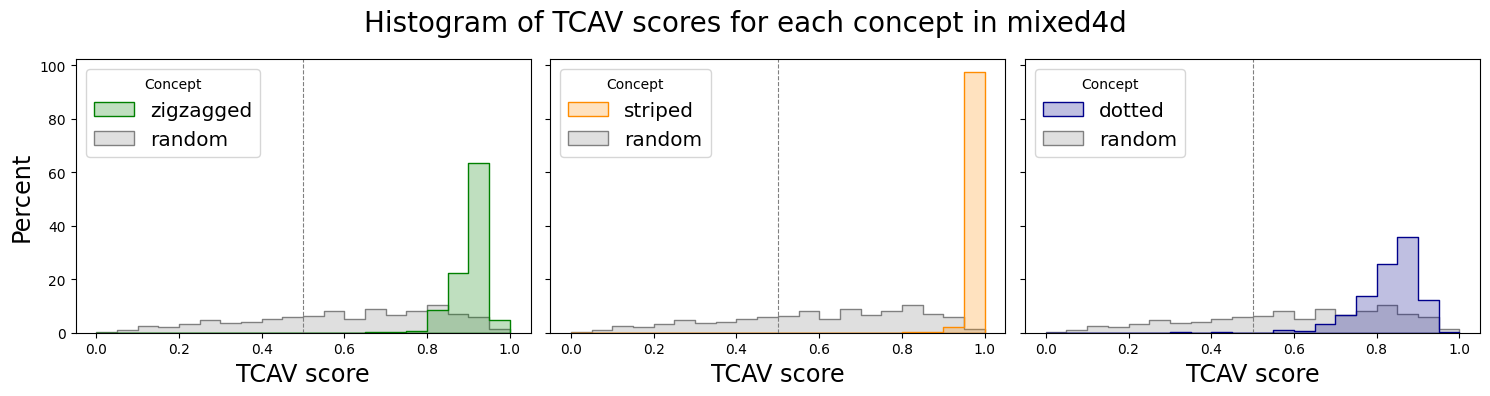

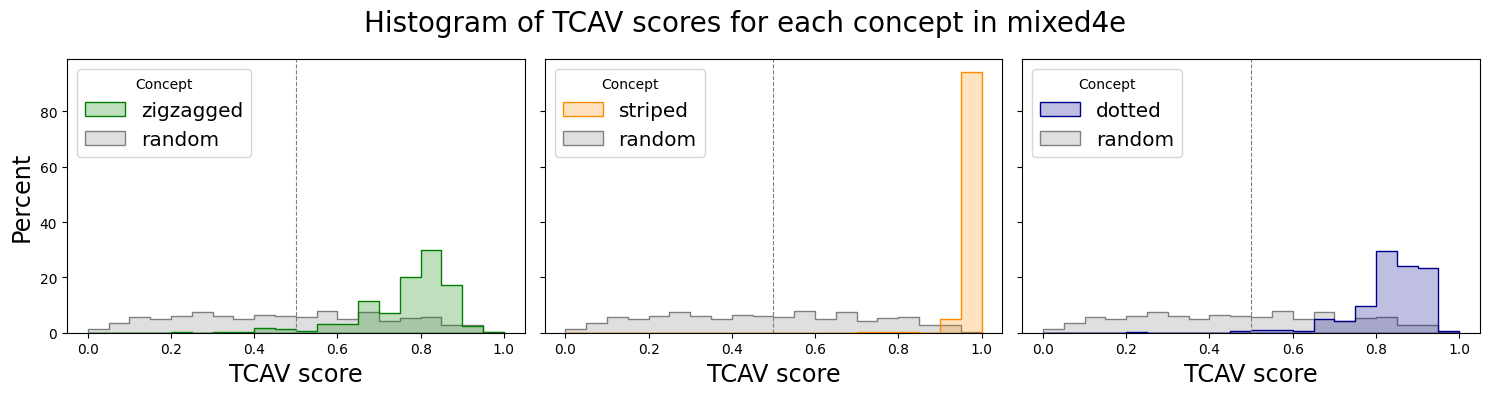

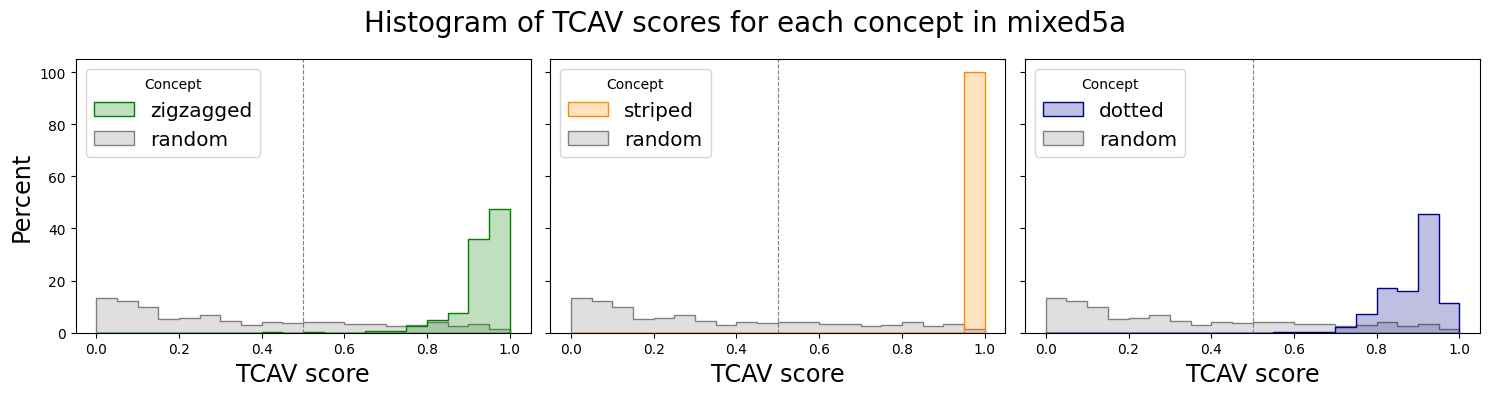

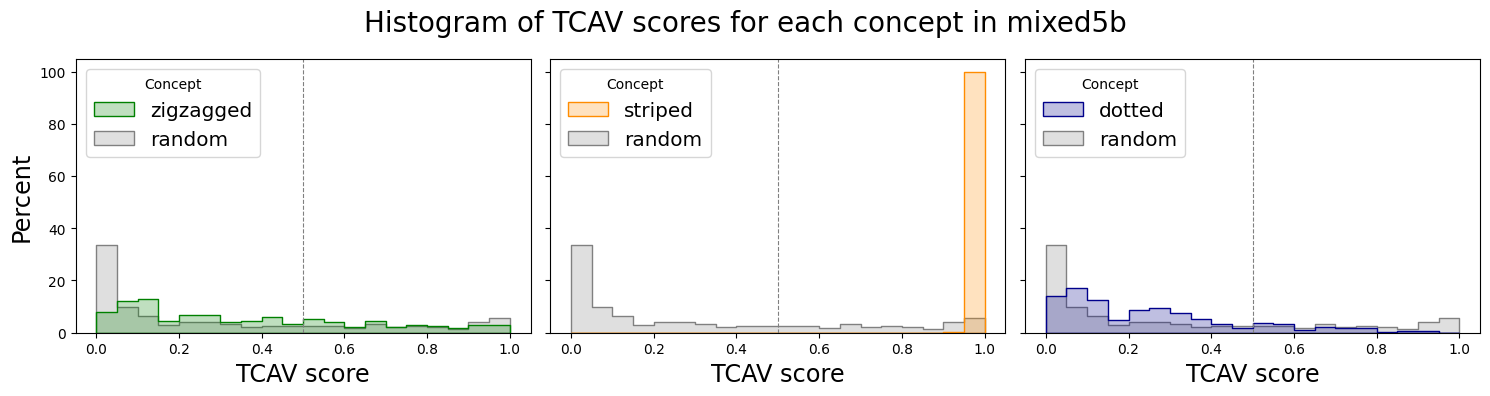

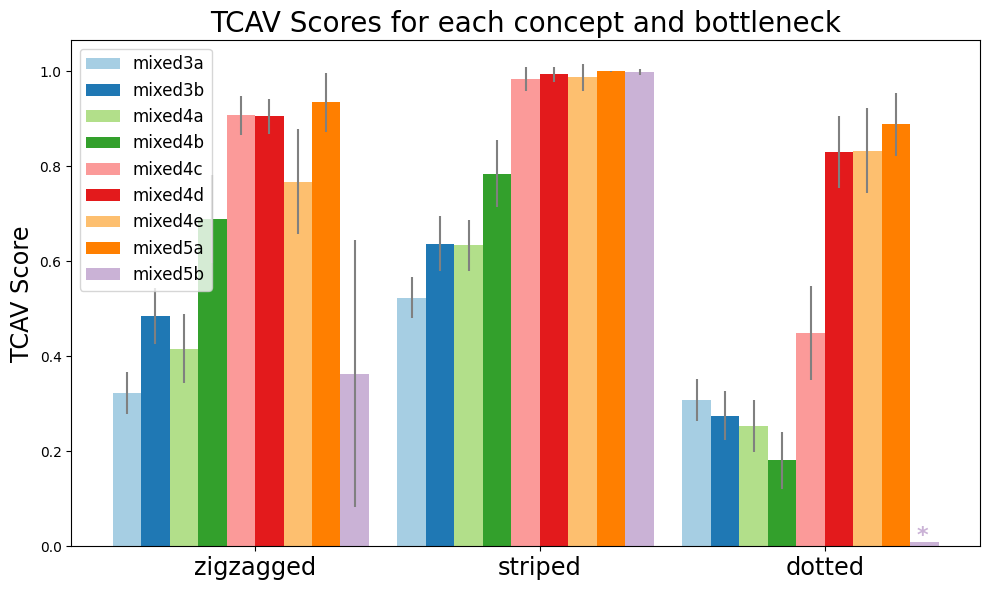

In [21]:
t_test_mean = None # 0.5 # None # if value given this will be a 1 sample t-test
bonferroni_nr = 27 #2
alternative = 'two-sided' # 'less' # 'greater'
num_random = int(name[-5]) # int(name[-6:-5])
distribution_info = utils_plot.plot_results(data, num_random_exp=num_random, plot_hist = True,min_p_val=0.05, bonferroni_nr = bonferroni_nr,
alternative = alternative, t_test_mean = None, save_fig = False) # 

In [12]:
# create 4 df with correct column names
layers = ['mixed3a', 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c', 'mixed4d','mixed4e', 'mixed5a', 'mixed5b']
idx = ['mean','std','p-value']

df_dot = pd.DataFrame(index = layers, columns = [np.array(['dotted']*3),np.array(idx)], dtype = 'float')
df_str = pd.DataFrame(index = layers, columns = [np.array(['striped']*3),np.array(idx)], dtype = 'float')
df_zig = pd.DataFrame(index = layers, columns = [np.array(['zigzagged']*3),np.array(idx)], dtype = 'float')
df_ran = pd.DataFrame(index = layers, columns = [np.array(['random']*3),np.array(idx)], dtype = 'float')

In [13]:

val_list = ['bn_vals','bn_stds','p-value']#,'significant']
for layer in layers:
    for v, value in enumerate(val_list):
        for i in range(3):
            if i == 2:
                df_dot.loc[layer,'dotted'][v] = distribution_info[layer][value][i]
            elif i == 1:
                distribution_info[layer][value][i]
                df_str.loc[layer,'striped'][v] = distribution_info[layer][value][i]
            else:
                distribution_info[layer][value][i]
                df_zig.loc[layer,'zigzagged'][v] = distribution_info[layer][value][i]

In [15]:
distribution_info[layer]

{'random_p-value': [0.5433186372745491, 0.09486309443993557],
 'bn_vals': [0.32314, 0.52364, 0.30804],
 'bn_stds': [0.04448753083730316, 0.0424729372659815, 0.043728233442479704],
 'significant': [True, True, True],
 'p-value': [0.0, 5.6687619615501795e-06, 0.0],
 'concept': ['zigzagged', 'striped', 'dotted']}

In [18]:
for layer in layers:
    if t_test_mean == None or t_test_mean == 0.5:
        print(layer,'significant',distribution_info[layer]['random_p-value'][1])
        idx = ['mean','std']
    else: 
        print(layer,'significant',distribution_info[layer]['random_p-value'][3])
    for i, val in enumerate(idx):
        df_ran.loc[layer,'random'][val] = distribution_info[layer]['random_p-value'][i]
        

mixed3a significant 0.09486309443993557
mixed3b significant 0.11930920224449541
mixed4a significant 0.14712273240109122
mixed4b significant 0.17583796942069713
mixed4c significant 0.20562604594457415
mixed4d significant 0.22898596394637613
mixed4e significant 0.24274097001822217
mixed5a significant 0.28987821840299066
mixed5b significant 0.33123562224135356


In [19]:
df_ran

random                  
             mean       std p-value
mixed3a  0.543319  0.094863     NaN
mixed3b  0.527747  0.119309     NaN
mixed4a  0.514236  0.147123     NaN
mixed4b  0.508196  0.175838     NaN
mixed4c  0.554942  0.205626     NaN
mixed4d  0.600132  0.228986     NaN
mixed4e  0.477659  0.242741     NaN
mixed5a  0.357106  0.289878     NaN
mixed5b  0.305932  0.331236     NaN

In [20]:
pd.concat([df_dot,df_str,df_zig],axis = 1)

dotted                           striped                           \
            mean       std        p-value     mean       std        p-value   
mixed3a  0.30804  0.043728   0.000000e+00  0.52364  0.042473   5.668762e-06   
mixed3b  0.27454  0.051513   0.000000e+00  0.63708  0.057923   9.404362e-84   
mixed4a  0.25292  0.054986  3.579370e-271  0.63370  0.053345   2.862923e-68   
mixed4b  0.18106  0.060019  2.741681e-293  0.78464  0.070510  7.441636e-221   
mixed4c  0.44892  0.098823   7.171608e-29  0.98284  0.025067   0.000000e+00   
mixed4d  0.82926  0.075512  1.321834e-100  0.99346  0.015704  2.064468e-262   
mixed4e  0.83268  0.089315  3.430399e-196  0.98686  0.027502   0.000000e+00   
mixed5a  0.88812  0.066456  5.302015e-289  0.99992  0.000891   0.000000e+00   
mixed5b  0.25326  0.213235   6.450773e-04  0.99884  0.005887   0.000000e+00   

        zigzagged                           
             mean       std        p-value  
mixed3a   0.32314  0.044488   0.000000e+00  
mixed3b   0.48464  0.058262   4.198233e-15  
mixed4a   0.41606  0.073312   1.917331e-46  
mixed4b   0.68834  0.092374  5.633908e-102  
mixed4c   0.90708  0.041831  1.466617e-259  
mixed4d   0.90476  0.037669  1.107140e-169  
mixed4e   0.76774  0.110773  3.875560e-136  
mixed5a   0.93432  0.061642   0.000000e+00  
mixed5b   0.36354  0.280214   2.819313e-04

In [9]:
with open(f'SavedResults/imagenet_tcav_results/concept_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,
     label = 'app_tab:imagenet stat num concept'))

with open(f'SavedResults/imagenet_tcav_results/random_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))


/tmp/ipykernel_27067/1468983682.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,
/tmp/ipykernel_27067/1468983682.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))
